# Занятие 1 (10.11.2018). Введение в машинное обучение.  Метод ближайших соседей

## Формулировка задачи

**Дано**: y=f(x)

**Задача**: найти f по набору точек

## Примеры

**Пример 1**:

| X | Y |
|---|:-:|
| 1 | 2 |
| 2 | 4 |
| 3 | 6 |
| 4 | ? |


Набор точек {X,Y} называется *обучающей выборкой*. 

Результат обучения алгоритма - функция $f: Y\approx f(X)$

$Y$ - *целевая переменная*
$f$ - *алгоритм*

Реальный пример: предсказание роста Y по весу X

**Пример 2**:

Зачастую функция $f$ зависит от нескольких аргументов. Например, предсказание объёмов продаж магазина по набору его критериев

![](http://eos.ibi.spb.ru/umk/15_2/5/pict/t1_1.gif)

Такая таблица называется *матрицей объект-признак*. Каждая строка соответствует объекту $X$ (конкретной точке), каждый столбец - признаку (конкретному аргументу функции $f$, конкретной координате).

**Пример 3**:

Линейная регрессия. $y=ax+b$

![](http://www.machinelearning.ru/wiki/images/8/89/Regression_Analysis_Linear.gif)

**Пример 4**:

Иногда функции $f$ более сложные и непредставимые в явном виде. Пример: финансы 

![](https://www.cse.unr.edu/~harryt/CS773C/Project/step1.png)

**Пример 5**:

Задача классификации. Y = {1,...,K}, где K-количество классов

![](http://static1.tothenew.com/blog/wp-content/uploads/2016/06/image.png)

## Типы задач машинного обучения


| Дан Y на обучении          | Область значений Y |            Тип задачи            | Примеры                  |
|----------------------------|--------------------|:--------------------------------:|--------------------------|
| Да (обучение с учителем)   | Дискретная         |           Классификация          | KNN, Logistic Regression |
| Да (обучение с учителем)   | Непрерывная        |             Регрессия            | KNN, Linear Regression   |
| Нет (обучение без учителя) | Дискретная         | Кластеризация                    | KMeans                   |
| Нет (обучение без учителя) | Непрерывная        | Экстремальное сжатие размерности | PCA(n=1)                 |

## Задача классификации. Метод ближайших соседей (K nearest neighbours, KNN)
**Дано:** Обучающая выборка $\{X_{train},Y_{train}\}$, $Y \in\{-1,+1\}$ (бинарная классификация). Найти: $Y_{test}$ для $X_{test}$.

**Идея:** делать предсказание на основе меток ближайших соседей

![](https://p3.pstatp.com/large/1cc60004b0d2ce596887)


**Формула:**
$f(x, X_{train}) = sign(\Sigma_{x_i\in X_{train}}w(x_i,x)y_i))$

* $w(x_i,x)$ - *важность объекта* $x_i$ при классификации нового объекта $x$
* $y_i\in\{-1,+1\}$ - *метка* класса для объекта $x_i$


*Вопрос:* какую $w(x_i,x)$ взять?

*Идея 1:* $w(x_i,x)\sim\rho(x_i,x)^{-1}$, где $\rho(x_i,x)$ - расстояние между объектами $x_i$ и $x$

*Идея 2:* $w(x_i,x)=K(\rho(x_i,x))$, где $K(\cdot)$ - ядро (потенциал)

*Идея 3:* $w(x_i,x)=\gamma_iK(\rho(x_i,x))$, где $\gamma_i$ - вес $x_i$ (заряд)


<center>
    <b>Важные параметры (SkLearn):</b> 
</center>

| Параметр (SkLearn) | Параметр (лекция) | Описание                       |
|--------------------|-------------------|--------------------------------|
| n_neighbors       | K                 | Число соседей                  |
| weights            | $\gamma$          | "заряды", веса соседей         |
| metric             | K + $\rho$        | "Потенциал", ядро + расстояние |



![](https://kevinzakka.github.io/assets/1nearestneigh.png)
![](https://kevinzakka.github.io/assets/20nearestneigh.png)

# Практика

## 1.1. Загрузка данных
Давайте загрузим данные Ириса Фишера
![](https://kevinzakka.github.io/assets/flower.jpg)

In [1]:
# !pip install seaborn 
# если seaborn не импортируется, установите его этой командой (либо без "!" в командной строке, либо)
import seaborn as sns # библиотека для визуализации
df = sns.load_dataset("iris") # в seaborn и sklearn iris dataset идёт из коробки

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## 1.2. Визуализация
Seaborn - отличный инструмент визуализации с большой [галереей](http://seaborn.pydata.org/examples/index.html) примеров

In [2]:
# df.head(100) # первые 100 строк
df.head() # выведем первые 5 строк таблицы

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

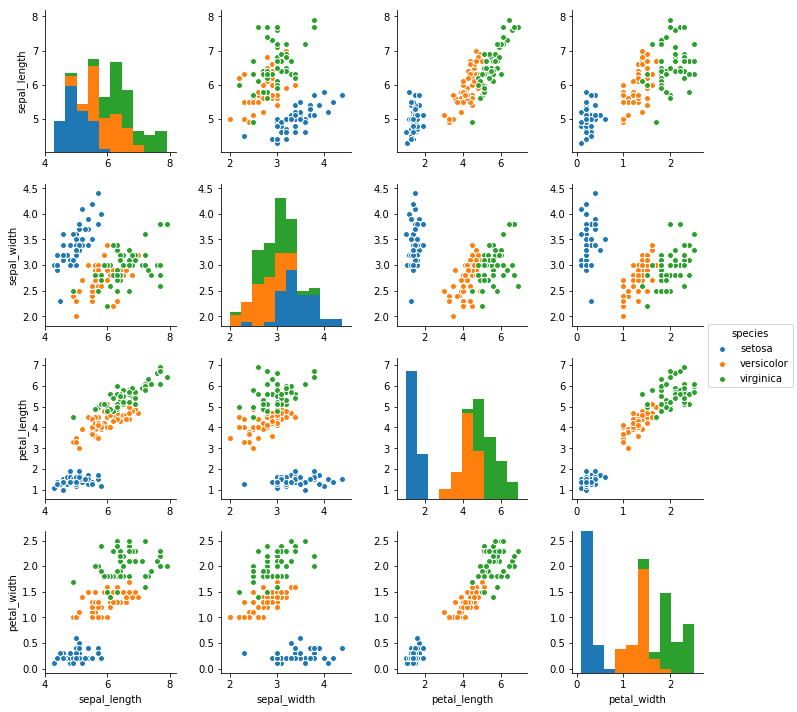

In [12]:
%matplotlib inline 
# %matplotlib inline - директива jupyter, которая позволяет рисовать графики в jupyter notebook
sns.pairplot(df, 'species') # диагональные элементы - гистограммы

## 1.3. Обучение модели
Давайте обучим модель и посмотрим на её качество. Запустите код несколько раз!

In [13]:
X = df.drop('species', 1) # возьмём в качестве объектов и признаков всё кроме колонки "species" (вид, разновидность цвета). 
# Метод .drop() выкидывает колонку "species". Если бы было .drop('species', 0), то выкинулась бы строка "species" 
y = df['species'] # в качестве целевой переменной возьмём вид цветка ("species")

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

clf = KNeighborsClassifier() # инициализируем классификатор с начальными параметрами. Сейчас классификатор не обучен
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) # разобьём выборку на обучающую и на тестовую (80% данных на обучение)
clf.fit(X_train, y_train) # обучим классификатор, указав ему, какие объекты (X) какие метки классов (y) имеют. Иными словами, какое значение y соответствует каждому объекту из X
y_pred = clf.predict(X_test) # получим предсказания обученного классификатора для тестовой выборки

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Посмотрим на предсказания

In [15]:
print('\n'.join(['Real: {}, Predicted: {}'.format(y_2, y_1) for y_1, y_2 in zip(y_pred, y_test)]))

Real: setosa, Predicted: setosa
Real: setosa, Predicted: setosa
Real: virginica, Predicted: virginica
Real: virginica, Predicted: virginica
Real: versicolor, Predicted: versicolor
Real: virginica, Predicted: virginica
Real: setosa, Predicted: setosa
Real: versicolor, Predicted: virginica
Real: setosa, Predicted: setosa
Real: setosa, Predicted: setosa
Real: versicolor, Predicted: versicolor
Real: setosa, Predicted: setosa
Real: versicolor, Predicted: virginica
Real: setosa, Predicted: setosa
Real: virginica, Predicted: virginica
Real: setosa, Predicted: setosa
Real: versicolor, Predicted: versicolor
Real: versicolor, Predicted: versicolor
Real: versicolor, Predicted: versicolor
Real: virginica, Predicted: virginica
Real: versicolor, Predicted: versicolor
Real: versicolor, Predicted: versicolor
Real: virginica, Predicted: virginica
Real: versicolor, Predicted: versicolor
Real: versicolor, Predicted: versicolor
Real: setosa, Predicted: setosa
Real: virginica, Predicted: virginica
Real: vi

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # доля правильных ответов

0.9333333333333333

Какой вывод можно сделать из результатов?

## 1.4 Посмотрим, как меняется качество от числа соседей
Попробуем поварьировать количество ближайших соседей

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


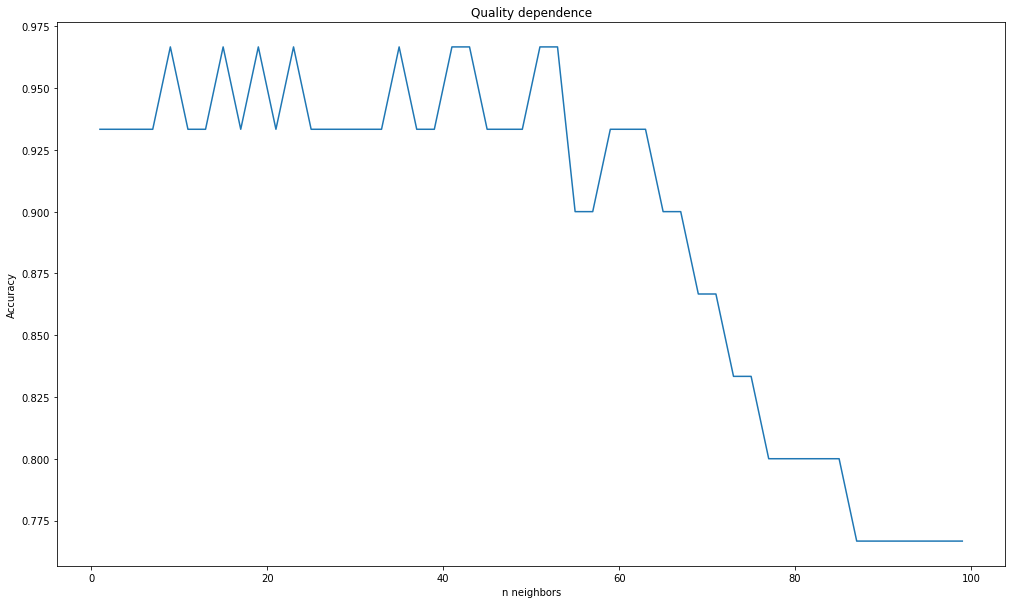

In [17]:
from sklearn.cross_validation import cross_val_score

neighbors = range(1,100,2) # 

# empty list that will hold cv scores
accuracies = []

for k in neighbors:
    clf = KNeighborsClassifier(n_neighbors=k)# Обучите здесь классификатор для данного параметра и измерьте его качество на тестовой выборке
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred) # доля правильных ответов
    accuracies.append(acc)

import matplotlib.pyplot as plt # подключение библиотеки для отрисовки графиков
plt.figure(figsize=(17,10)) # сделаем график большим
plt.title('Quality dependence') # зададим заголовок к графику
plt.xlabel('n neighbors')
plt.ylabel('Accuracy')
plt.plot(neighbors, accuracies) # отрисуем график

## Задание 1
Среди заданного набора параметров для метода ближайших соседей найдите такие параметры, при которых качество алгоритма (accuracy) оказывается наилучшим

In [18]:
def square_distance(x):
    return 1/x*2

params_grid = {
    'n_neighbors': range(1,100,2), # Перебираем от 1 до 100 с шагом 2
    'weights': ['uniform', 'distance', square_distance], # с каким весом берём каждого соседа. uniform - с одинаковым, distance - обратно пропорционально расстоянию. Ещё можно передать свою функцию
    'algorithm': ['auto'], # алгоритм поиска ближайших соседей. Влияет только на скорость обучения
    'leaf_size': [30], # параметры некоторых алгоритмов поиска ближ соседей. Влияет только на скорость обучения
    'metric': ['minkowski'], # метрика расстояния, используемая в алгоритме поиска ближайших соседей
    'p': [2] # параметр метрики, используемой в методе ближайших соседей 
}        

In [21]:
best_params = []
best_acc = 0

# your code here
for n in params_grid['n_neighbors']:
    for w in params_grid['weights']:
        # Обучите здесь классификатор для данного параметра и измерьте 
        # его качество на тестовой выборке
        params = [
            n, 
            w, 
            params_grid['algorithm'][0],
            params_grid['leaf_size'][0], 
            params_grid['metric'][0],
            params_grid['p'][0]
            ]
        clf = KNeighborsClassifier(
            n_neighbors=n, 
            weights=w, 
            algorithm=params_grid['algorithm'][0],
            leaf_size=params_grid['leaf_size'][0],
            metric=params_grid['metric'][0],
            p=params_grid['p'][0]
            )
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred) # доля правильных ответов
        if best_acc < acc:
            best_acc = acc
            accuracies.append(acc)
            best_params = params


print('Best accuracy: %f' % best_acc)
print(best_params)

Best accuracy: 0.966667
[9, 'uniform', 'auto', 30, 'minkowski', 2]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


## Задание 2

Предсказание выживших титаника. Загрузите файл и по выбранным вами числовым признакам постройте наилучшую модель ближайших соседей для предсказания колонки *Survived*

In [22]:
import pandas as pd # библиотека для чтения и работы с данными
data = pd.read_csv('https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv', sep='\t')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
PassengerId    156 non-null int64
Survived       156 non-null int64
Pclass         156 non-null int64
Name           156 non-null object
Sex            156 non-null object
Age            126 non-null float64
SibSp          156 non-null int64
Parch          156 non-null int64
Ticket         156 non-null object
Fare           156 non-null float64
Cabin          31 non-null object
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 14.7+ KB


In [26]:
features_list = ['PassengerId', 'Pclass', 'SibSp', 'Parch'] # дополните этот список другими, важными на ваш взгляд, числовыми признаками
X, y = data[features_list], data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Добейтесь наилучшего качества (accuracy) на тестовой выборке

In [27]:
# your code here
best_params = []
best_acc = 0

# your code here
for n in params_grid['n_neighbors']:
    for w in params_grid['weights']:
        # Обучите здесь классификатор для данного параметра и измерьте 
        # его качество на тестовой выборке
        params = [
            n, 
            w, 
            params_grid['algorithm'][0],
            params_grid['leaf_size'][0], 
            params_grid['metric'][0],
            params_grid['p'][0]
            ]
        clf = KNeighborsClassifier(
            n_neighbors=n, 
            weights=w, 
            algorithm=params_grid['algorithm'][0],
            leaf_size=params_grid['leaf_size'][0],
            metric=params_grid['metric'][0],
            p=params_grid['p'][0]
            )
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred) # доля правильных ответов
        if best_acc < acc:
            best_acc = acc
            accuracies.append(acc)
            best_params = params


print('Best accuracy: %f' % best_acc)
print(best_params)

Best accuracy: 0.750000
[11, 'uniform', 'auto', 30, 'minkowski', 2]


# Полезные ссылки
* [Пример](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/) с Iris и KNN
* (*) [Алгоритмы поиска ближайших соседей](https://www.youtube.com/watch?v=UUm4MOyVTnE)